In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('US_Accidents.csv')

## Basic info about dataset

In [3]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day


In [4]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1516064 non-null  object 
 1   Severity               1516064 non-null  int64  
 2   Start_Time             1516064 non-null  object 
 3   End_Time               1516064 non-null  object 
 4   Start_Lat              1516064 non-null  float64
 5   Start_Lng              1516064 non-null  float64
 6   End_Lat                1516064 non-null  float64
 7   End_Lng                1516064 non-null  float64
 8   Distance(mi)           1516064 non-null  float64
 9   Description            1516064 non-null  object 
 10  Number                 469969 non-null   float64
 11  Street                 1516064 non-null  object 
 12  Side                   1516064 non-null  object 
 13  City                   1515981 non-null  object 
 14  County            

In [6]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,4.699690e+05,1.473031e+06,1.066748e+06,1.470555e+06,1.479790e+06,1.471853e+06,1.387202e+06,1.005515e+06
mean,2.238630e+00,3.690056e+01,-9.859919e+01,3.690061e+01,-9.859901e+01,5.872617e-01,8.907533e+03,5.958460e+01,5.510976e+01,6.465960e+01,2.955495e+01,9.131755e+00,7.630812e+00,8.477855e-03
std,6.081481e-01,5.165653e+00,1.849602e+01,5.165629e+00,1.849590e+01,1.632659e+00,2.242190e+04,1.827316e+01,2.112735e+01,2.325986e+01,1.016756e+00,2.889112e+00,5.637364e+00,1.293168e-01
min,1.000000e+00,2.457022e+01,-1.244976e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.385422e+01,-1.182076e+02,3.385420e+01,-1.182077e+02,0.000000e+00,1.212000e+03,4.700000e+01,4.080000e+01,4.800000e+01,2.944000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.735113e+01,-9.438100e+01,3.735134e+01,-9.437987e+01,1.780000e-01,4.000000e+03,6.100000e+01,5.700000e+01,6.800000e+01,2.988000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.072593e+01,-8.087469e+01,4.072593e+01,-8.087449e+01,5.940000e-01,1.010000e+04,7.300000e+01,7.100000e+01,8.400000e+01,3.004000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.706000e+02,1.130000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


## Data Cleaning

In [7]:
df.dtypes.value_counts()

object     20
float64    13
bool       13
int64       1
dtype: int64

In [8]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

df_num= df.select_dtypes(numerics)
len(df_num.columns)

14

## Percentage of missing values per column

In [9]:
missing_percentages= df.isna().sum().sort_values(ascending = False)*100/ len(df)
missing_percentages

Number                   69.000715
Precipitation(in)        33.675953
Wind_Chill(F)            29.637007
Wind_Speed(mph)           8.499773
Humidity(%)               3.001786
Visibility(mi)            2.916170
Weather_Condition         2.902714
Temperature(F)            2.838469
Wind_Direction            2.760965
Pressure(in)              2.392643
Weather_Timestamp         1.996222
Airport_Code              0.280199
Timezone                  0.151841
Zipcode                   0.061673
Sunrise_Sunset            0.005475
Civil_Twilight            0.005475
Nautical_Twilight         0.005475
Astronomical_Twilight     0.005475
City                      0.005475
Country                   0.000000
Give_Way                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Turning_Loop              0.000000
Traffic_Signal            0.000000
Traffic_Calming           0.000000
Stop                      0.000000
Station             

<AxesSubplot:>

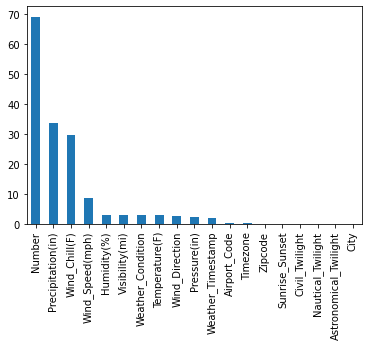

In [10]:
missing_percentages[missing_percentages!=0].plot(kind="bar")

#For the number,precipitation and wind column, there are around 70%,35% and 30% of missing values respectively. So it is better to remove these columns.

In [11]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [12]:
df.drop(["Number"],axis=1,inplace=True) 
df.drop(["Precipitation(in)"],axis=1,inplace=True) 
df.drop(["Wind_Chill(F)"],axis=1,inplace=True)

In [13]:
#Droping rest of unused columns and relatively less significant columns

In [15]:
df.drop(["End_Lat"],axis=1,inplace=True) 
df.drop(["End_Lng"],axis=1,inplace=True) 
df.drop(["Airport_Code"],axis=1,inplace=True) 
df.drop(["Zipcode"],axis=1,inplace=True) 
df.drop(["Country"],axis=1,inplace=True) 
df.drop(["Timezone"],axis=1,inplace=True)  
df.drop(["Wind_Direction"],axis=1,inplace=True)  
df.drop(["Amenity"],axis=1,inplace=True) 
df.drop(["Give_Way"],axis=1,inplace=True) 
df.drop(["No_Exit"],axis=1,inplace=True) 
df.drop(["Roundabout"],axis=1,inplace=True) 
df.drop(["Stop"],axis=1,inplace=True) 
df.drop(["Traffic_Calming"],axis=1,inplace=True) 
df.drop(["Turning_Loop"],axis=1,inplace=True) 
df.drop(["Astronomical_Twilight"],axis=1,inplace=True) 
df.drop(["Nautical_Twilight"],axis=1,inplace=True) 
df.drop(["Civil_Twilight"],axis=1,inplace=True) 
df.drop(["Sunrise_Sunset"],axis=1,inplace=True) 
df.drop(["Weather_Timestamp"],axis=1,inplace=True)

In [16]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'Distance(mi)', 'Description', 'Street', 'Side', 'City', 'County',
       'State', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Speed(mph)', 'Weather_Condition', 'Bump',
       'Crossing', 'Junction', 'Railway', 'Station', 'Traffic_Signal'],
      dtype='object')

In [18]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,Side,...,Pressure(in),Visibility(mi),Wind_Speed(mph),Weather_Condition,Bump,Crossing,Junction,Railway,Station,Traffic_Signal
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,Outerbelt E,R,...,29.76,10.0,10.4,Light Rain,False,False,False,False,False,False
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,0.747,At OH-4/OH-235/Exit 41 - Accident.,I-70 E,R,...,29.68,10.0,NaN,Light Rain,False,False,False,False,False,False
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,0.055,At I-71/US-50/Exit 1 - Accident.,I-75 S,R,...,29.70,10.0,NaN,Overcast,False,False,True,False,False,False
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,0.219,At I-71/US-50/Exit 1 - Accident.,US-50 E,R,...,29.70,10.0,NaN,Overcast,False,False,True,False,False,False
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,0.123,At Dart Ave/Exit 21 - Accident.,I-77 N,R,...,29.65,10.0,NaN,Overcast,False,False,False,False,False,False


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 25 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   ID                 1516064 non-null  object 
 1   Severity           1516064 non-null  int64  
 2   Start_Time         1516064 non-null  object 
 3   End_Time           1516064 non-null  object 
 4   Start_Lat          1516064 non-null  float64
 5   Start_Lng          1516064 non-null  float64
 6   Distance(mi)       1516064 non-null  float64
 7   Description        1516064 non-null  object 
 8   Street             1516064 non-null  object 
 9   Side               1516064 non-null  object 
 10  City               1515981 non-null  object 
 11  County             1516064 non-null  object 
 12  State              1516064 non-null  object 
 13  Temperature(F)     1473031 non-null  float64
 14  Humidity(%)        1470555 non-null  float64
 15  Pressure(in)       1479790 non-n

In [ ]:
#Filling missing value of numerical columns with median

In [20]:
df["Temperature(F)"]=df["Temperature(F)"].fillna(df["Temperature(F)"].median())

In [21]:
df["Humidity(%)"]=df["Humidity(%)"].fillna(df["Humidity(%)"].median())

In [22]:
df["Visibility(mi)"]=df["Visibility(mi)"].fillna(df["Visibility(mi)"].median())

In [28]:
df["Pressure(in)"]=df["Pressure(in)"].fillna(df["Pressure(in)"].median())

In [29]:
df["Wind_Speed(mph)"]=df["Wind_Speed(mph)"].fillna(df["Wind_Speed(mph)"].median())

#Removing missing rows for city column

In [30]:
df.dropna(subset=["City"],inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1515981 entries, 0 to 1516063
Data columns (total 25 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   ID                 1515981 non-null  object 
 1   Severity           1515981 non-null  int64  
 2   Start_Time         1515981 non-null  object 
 3   End_Time           1515981 non-null  object 
 4   Start_Lat          1515981 non-null  float64
 5   Start_Lng          1515981 non-null  float64
 6   Distance(mi)       1515981 non-null  float64
 7   Description        1515981 non-null  object 
 8   Street             1515981 non-null  object 
 9   Side               1515981 non-null  object 
 10  City               1515981 non-null  object 
 11  County             1515981 non-null  object 
 12  State              1515981 non-null  object 
 13  Temperature(F)     1515981 non-null  float64
 14  Humidity(%)        1515981 non-null  float64
 15  Pressure(in)       1515981 non-n

In [32]:
df["Weather_Condition"]=df["Weather_Condition"].fillna(df["Weather_Condition"].mode()[0])

In [33]:
df.isna().sum()

ID                   0
Severity             0
Start_Time           0
End_Time             0
Start_Lat            0
Start_Lng            0
Distance(mi)         0
Description          0
Street               0
Side                 0
City                 0
County               0
State                0
Temperature(F)       0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Speed(mph)      0
Weather_Condition    0
Bump                 0
Crossing             0
Junction             0
Railway              0
Station              0
Traffic_Signal       0
dtype: int64

# Analysed columns:
    State
    City
    Start Time
    Start Lat, Start Lng
    Weather Condition

## State

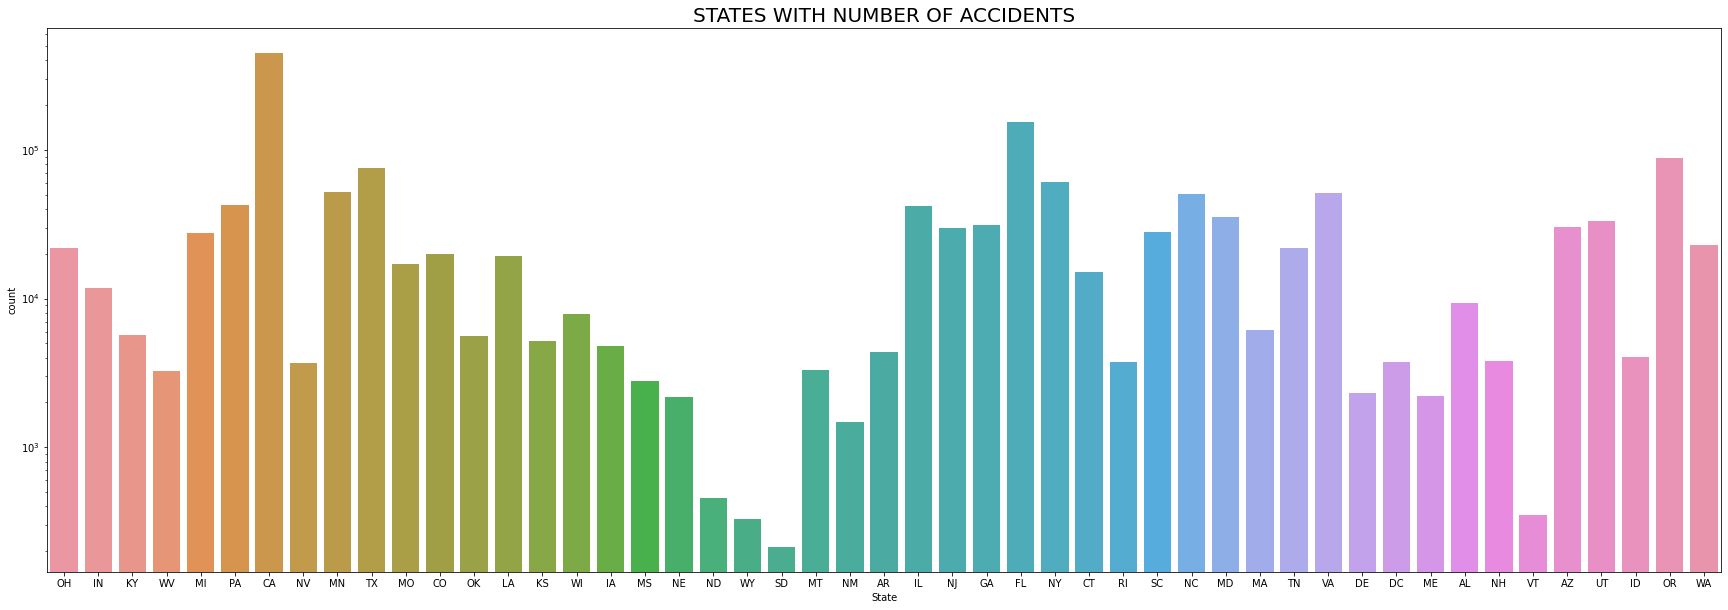

In [62]:
plt.figure(figsize=(30,10))
sns.countplot(x="State",data=df)
plt.yscale("log")
plt.title("STATES WITH NUMBER OF ACCIDENTS",fontsize=20)
plt.show()

## Cities with most accidents

In [92]:
len(df.City.unique())

10657

In [98]:
top_cities=df["City"].value_counts()
top_cities.columns=['city', 'accidents']
top_cities[:20]

Los Angeles     39984
Miami           36233
Charlotte       22203
Houston         20843
Dallas          19497
Sacramento      18431
Orlando         16169
Portland        14805
San Diego       14090
Minneapolis     12653
Atlanta         11854
Chicago         11507
Saint Paul      10084
Phoenix          9934
Raleigh          9516
San Jose         9362
Richmond         8472
Nashville        8381
Riverside        8201
Jacksonville     7815
Name: City, dtype: int64

<AxesSubplot:>

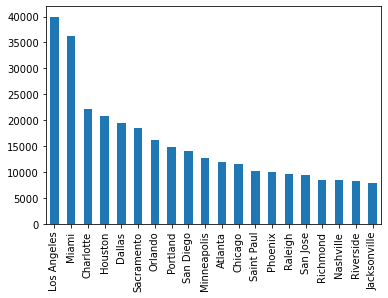

In [99]:
top_cities[:20].plot(kind='bar')

### Distribution of accidents

<AxesSubplot:xlabel='City', ylabel='Count'>

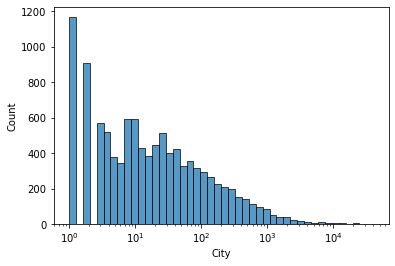

In [100]:
sns.histplot(top_cities, log_scale=True)

### Cities with 1 accidents

In [101]:
top_cities[top_cities==1]

South Paris                     1
Aberdeen Proving Ground         1
Rebecca                         1
Hiltons                         1
Jeanerette                      1
                               ..
Manzanita                       1
West Brooklyn                   1
Garfield Heights                1
Belding                         1
American Fork-Pleasant Grove    1
Name: City, Length: 1167, dtype: int64

# Analysing Start Time

In [107]:
df.Start_Time

0         2016-02-08 00:37:08
1         2016-02-08 05:56:20
2         2016-02-08 06:15:39
3         2016-02-08 06:15:39
4         2016-02-08 06:51:45
                  ...        
1516059   2019-08-23 18:03:25
1516060   2019-08-23 19:11:30
1516061   2019-08-23 19:00:21
1516062   2019-08-23 19:00:21
1516063   2019-08-23 18:52:06
Name: Start_Time, Length: 1515981, dtype: datetime64[ns]

In [108]:
df.Start_Time = pd.to_datetime(df.Start_Time)

### Accidents according to hour of day

/Users/ujjwalpathak/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time', ylabel='Density'>

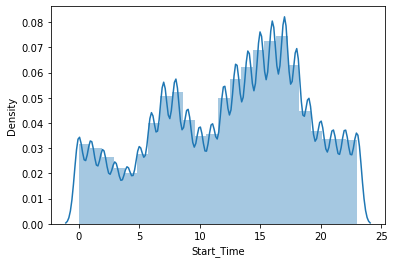

In [111]:
sns.distplot(df.Start_Time.dt.hour, bins=24, norm_hist=True)

Highest percentages of accidents occurs between 2pm and 6 pm and there is also surge in accident number from 7 am to 10 am. This might be due to people hurrying while going to work and returning from work. It might be also because these are mostly busiest hours on the road.

### Accidents according to day of week

/Users/ujjwalpathak/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time', ylabel='Density'>

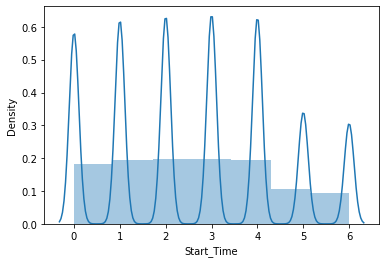

In [104]:
sns.distplot(df.Start_Time.dt.dayofweek, bins=7, norm_hist=True)

Accidents are evenly distributed among weekdays. Its higher then weekends. This might be because of less traffic on weekends. So, lets see how accidents are distributed win weekend.

/Users/ujjwalpathak/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time', ylabel='Density'>

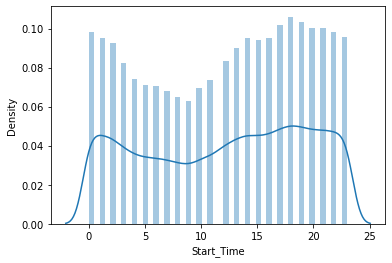

In [51]:
df_sunday= df.Start_Time[df.Start_Time.dt.dayofweek==6]
sns.distplot(df_sunday.dt.hour, norm_hist=True)

/Users/ujjwalpathak/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

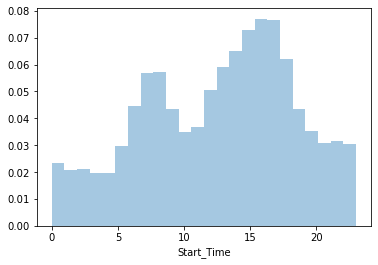

In [113]:
df_monday = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
sns.distplot(df_monday.dt.hour, bins=24, kde=False, norm_hist=True)

Sundays has more even distribution of accidents, compared to monday.

<AxesSubplot:xlabel='Start_Time', ylabel='Density'>

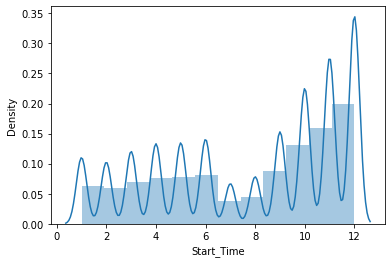

In [114]:
sns.distplot(df.Start_Time.dt.month, bins=12, norm_hist=True)

/Users/ujjwalpathak/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time', ylabel='Density'>

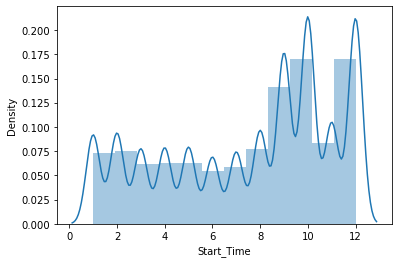

In [106]:
df_2019 = df[df.Start_Time.dt.year==2019]
sns.distplot(df_2019.Start_Time.dt.month, bins=12, norm_hist=True)

September and December are most accident prone months.

### Analysing Start Latitude and Longitude

<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

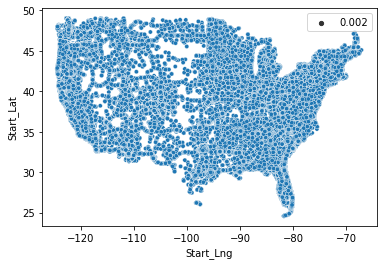

In [115]:
sns.scatterplot(x=df.Start_Lng, y= df.Start_Lat, size = 0.002)

In [116]:
import folium

In [117]:
lat, lon = df.Start_Lat[0], df.Start_Lng[0]
lat, lon

(40.10891, -83.09286)

In [118]:
for x in df[['Start_Lat', 'Start_Lng']].sample(100).iteritems():
    print(x[1])

523960     37.961464
4104       38.642078
39208      40.715050
460362     44.098506
1302239    37.663618
             ...    
295454     26.640874
696741     34.065739
1330191    34.118150
1143532    33.930896
631454     38.875433
Name: Start_Lat, Length: 100, dtype: float64
523960    -122.507968
4104      -121.456910
39208      -73.992390
460362    -121.301875
1302239   -121.027790
              ...    
295454     -81.855451
696741    -117.507127
1330191   -117.841960
1143532   -118.317768
631454     -76.973637
Name: Start_Lng, Length: 100, dtype: float64


In [119]:
zip(list(df.Start_Lat), list(df.Start_Lng))

In [120]:
from folium.plugins import HeatMap

In [121]:
sample_df = df.sample(int(0.001 * len(df)))
lat_lon_pairs = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))

In [122]:
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map

### Weather Conditions and accidents

In [143]:
df_weather=df["Weather_Condition"].value_counts()

<AxesSubplot:>

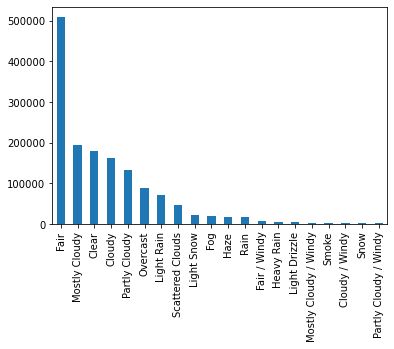

In [144]:
df_weather[:20].plot(kind='bar')

In [156]:
values=["Fair","Mostly Cloudy","Fog","Light Rain","Rain","Heavy Rain","Snow"]

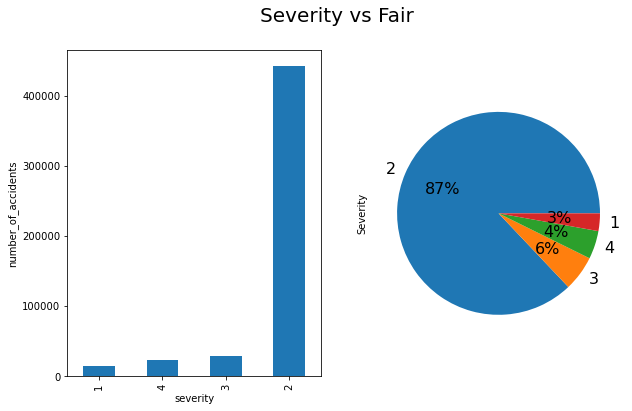

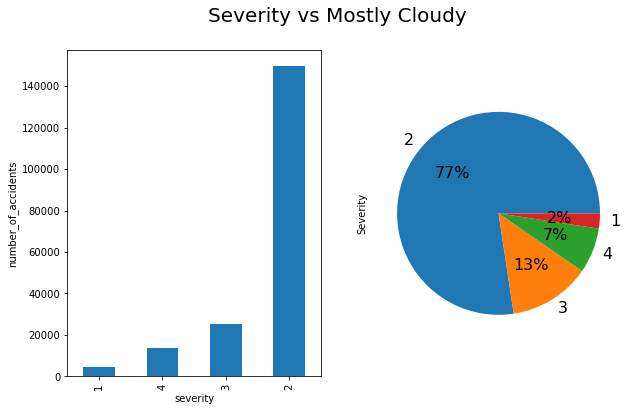

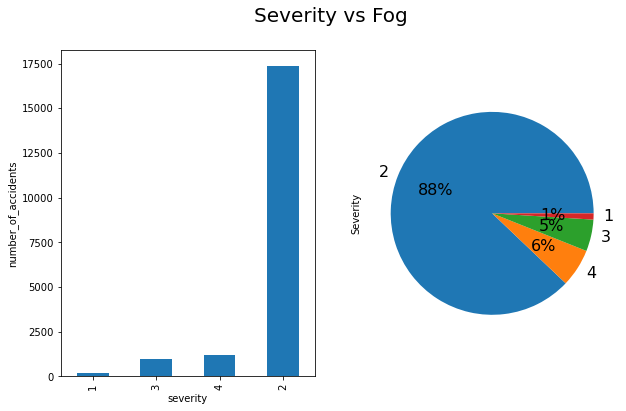

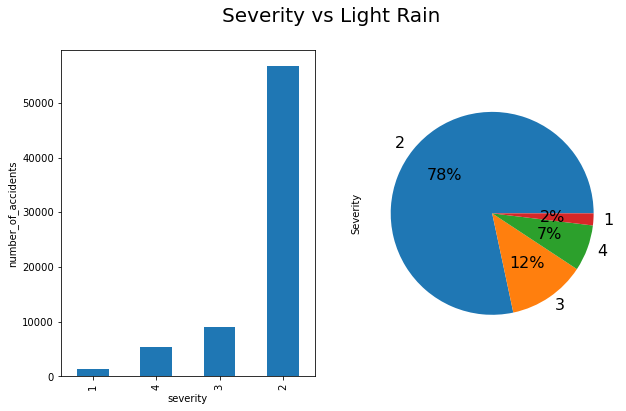

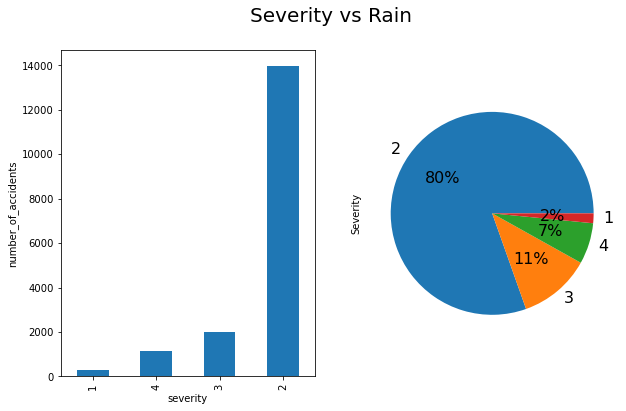

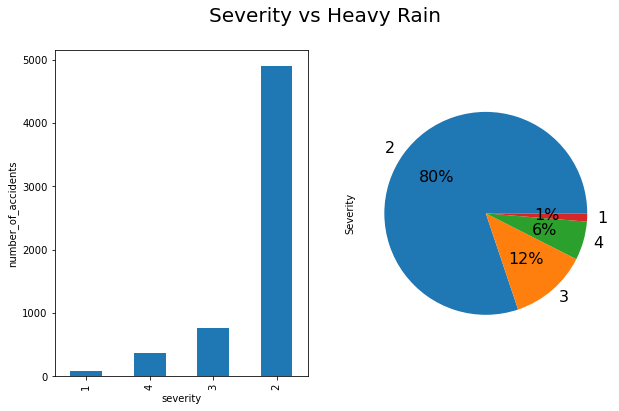

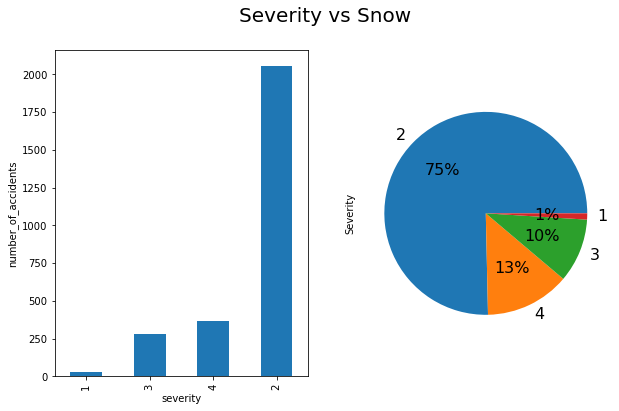

In [157]:
for x in ["Fair","Mostly Cloudy","Fog","Light Rain","Rain","Heavy Rain","Snow"]:
    plt.subplots(1,2,figsize=(10,6))
    plt.subplot(1,2,1)
    df.loc[df["Weather_Condition"]==x]["Severity"].value_counts().sort_values().plot(kind="bar")
    plt.suptitle("Severity vs "+str(x),fontsize=20)
    plt.xlabel("severity")
    plt.ylabel("number_of_accidents")
    plt.subplot(1,2,2)
    df.loc[df["Weather_Condition"] == x]['Severity'].value_counts().plot.pie(autopct='%1.0f%%',fontsize=16)


Most accidents occurs while weather conditions are fair, however they are less severe compared to bad weather conditions such as snowy, cloudy and rainy instances.